# OHP Air Transparency for a  molecular scattering and absorbing sky

He we vary the PWV absorption

- author Sylvie Dagoret-Campagne
- creation date April 2017


The purpose is to compare the air transparency for pure molecular absorbing sky,

- precipitable $O_3$ is default from LibRadTran 
- $H_2O$ vary from 0MM to 15mm  

In [2]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import pandas as pd
import os
import re

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Definition

## Airmass definition

- This flag allows to select the airmass we want to study

In [14]:
sel_airmass_tag='z10'

## Defines where the LibRadTran files are

In [5]:
currentpath=os.getcwd()
rootpath_us='../simulations/RT/2.0.1/OH/pp/us/sa/rt/wv/out/'
rootpath_mw='../simulations/RT/2.0.1/OH/pp/mw/sa/rt/wv/out/'
rootpath_ms='../simulations/RT/2.0.1/OH/pp/ms/sa/rt/wv/out/'

# Initialisation
## Build the list of the files

In [12]:
filelist_us=os.listdir(rootpath_us) 
filelist_mw=os.listdir(rootpath_mw) 
filelist_ms=os.listdir(rootpath_ms) 

### Make a sublist of the files for sky afglmw

In [15]:
filelist_afglmw= []
for filename in filelist_mw:
    if re.search(sel_airmass_tag,filename):  #example of filename filter
        filelist_afglmw.append(filename)

### Make a sublist of the files for sky afglms

In [16]:
filelist_afglms= []
for filename in filelist_ms:
    if re.search(sel_airmass_tag,filename):  #example of filename filter
        filelist_afglms.append(filename)

### Make a sublist of the files for sky afglus

In [17]:
filelist_afglus= []
for filename in filelist_us:
    if re.search(sel_airmass_tag,filename): #example of filename filter
        filelist_afglus.append(filename)

# Plot

###  Show the air transparences for sky afglmw

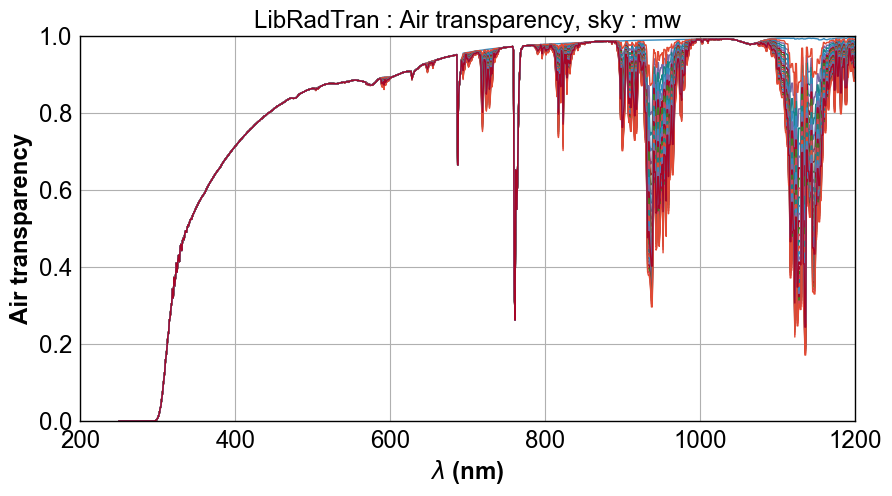

In [19]:
for filename in filelist_afglmw:
    fullpath=os.path.join(rootpath_mw,filename)
    data = np.loadtxt(fullpath)
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y)
plt.xlim(200,1200)
plt.ylim(0.,1)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Air transparency')   
plt.title('LibRadTran : Air transparency, sky : mw')

###  Show the air transparences for sky afglms

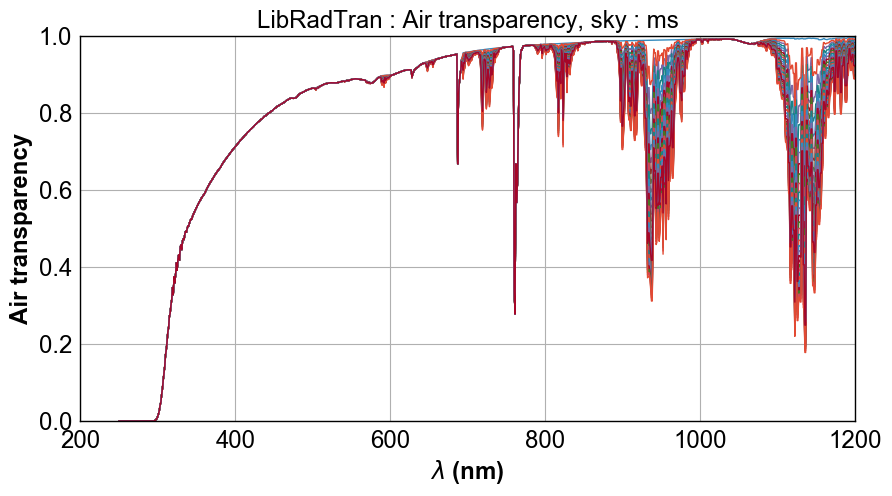

In [20]:
for filename in filelist_afglms:
    fullpath=os.path.join(rootpath_ms,filename)
    data = np.loadtxt(fullpath)
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y)
plt.xlim(200,1200)
plt.ylim(0.,1)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Air transparency')   
plt.title('LibRadTran : Air transparency, sky : ms')

### Show the air transparences for sky afglus

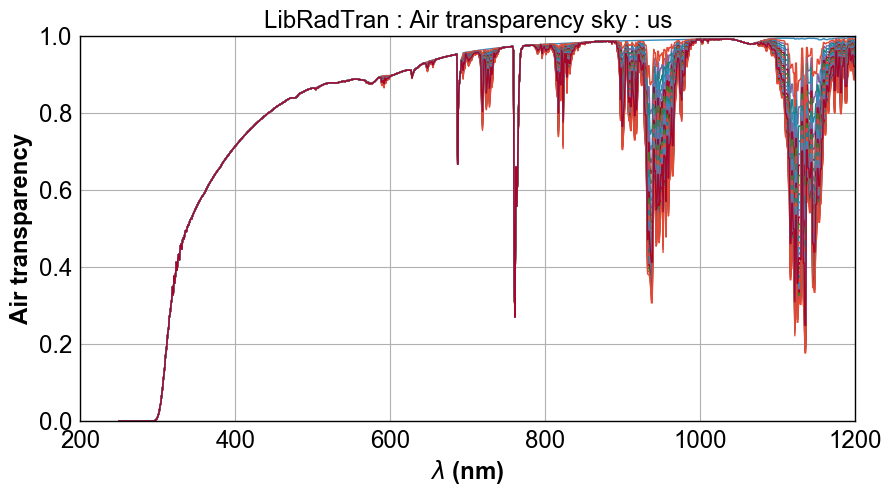

In [10]:
for filename in filelist_afglus:
    fullpath=os.path.join(rootpath_us,filename)
    data = np.loadtxt(fullpath)
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y)
    
plt.xlim(200,1200)
plt.ylim(0.,1)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Air transparency')   
plt.title('LibRadTran : Air transparency sky : us')

## Conclusion

The transparencies are the same concerning the molecular scattering

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide


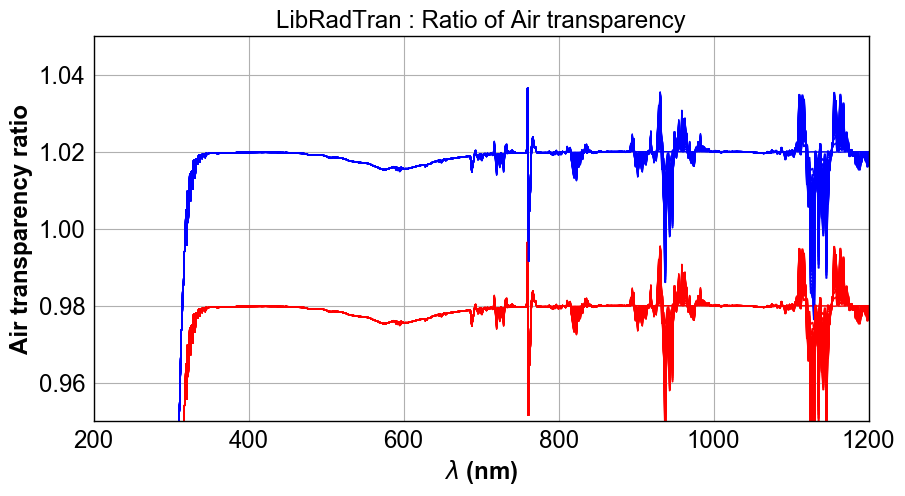

In [27]:
for index,filename1 in np.ndenumerate(filelist_afglus):
    idx=index[0]
    filename2=filelist_afglmw[idx]
    filename3=filelist_afglms[idx]
    fullpath1=os.path.join(rootpath_us,filename1)
    fullpath2=os.path.join(rootpath_mw,filename2)
    fullpath3=os.path.join(rootpath_mw,filename3)
    data1 = np.loadtxt(fullpath1)
    x1=data1[:,0]
    y1=data1[:,1]
    data2 = np.loadtxt(fullpath2)
    x2=data2[:,0]
    y2=data2[:,1]
    data2 = np.loadtxt(fullpath2)
    x3=data2[:,0]
    y3=data2[:,1]
    ratio1=y2/y1
    ratio2=y3/y1
    plt.plot(x1,ratio1-0.02,'r')
    plt.plot(x1,ratio2+0.02,'b')
plt.xlim(200,1200)
plt.ylim(0.95,1.05)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Air transparency ratio')   
plt.title('LibRadTran : Ratio of Air transparency') 
#plt.legend()

So there is no difference on ratio due to water and oxygen